In [39]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [40]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
from datetime import timedelta

## Reflect Tables into SQLALchemy ORM

In [41]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [42]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [43]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

# reflect the tables
inspector = inspect(engine)
inspector.get_table_names()

# View all of the classes that automap found


['measurement', 'station']

In [47]:
# Save references to each table

Station= Base.classes.station
Measurement= Base.classes.measurement

In [48]:
# Create our session (link) from Python to the DB
session = Session(engine)

## Bonus Challenge Assignment: Temperature Analysis II

In [49]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, maximum, and average temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# For example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [52]:
# Use the function `calc_temps` to calculate the tmin, tavg, and tmax 
# for a year in the data set
temp_of_2012 = calc_temps('2012-01-01', '2012-12-31')[0]
print(temp_of_2012)

(56.0, 72.26401515151515, 86.0)


FileNotFoundError: [Errno 2] No such file or directory: 'output_charts/average_trip_temperature.png'

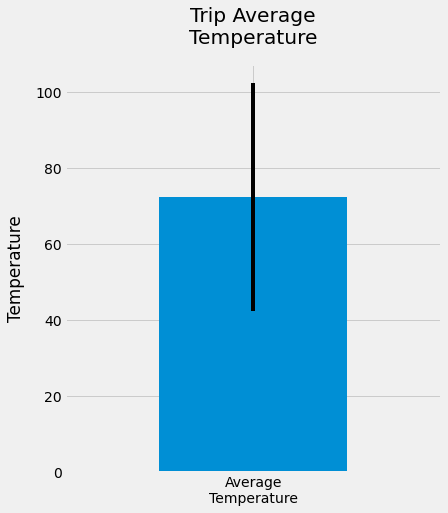

In [54]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for bar height (y value)
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

plt.figure(num=None, figsize=(6,7), dpi=None,                   
           facecolor=None, edgecolor=None, frameon=True)
# Fot x axis
x_axis = 'Average\nTemperature'                                 
# Fot y axis
y_axis = temp_of_2012[1]                                        
# To plot bar chart 
plt.bar(x_axis, y_axis, label='Average temperatures',           
        width=.5, yerr=(temp_of_2012[0]-temp_of_2012[2]))       

plt.xlim(-.5, .5)                                               

plt.title("Trip Average\nTemperature", fontsize='x-large',      
           loc='center', pad=20)

plt.ylabel("Temperature",                         
           fontsize='large', labelpad=10)

plt.savefig("output_charts/average_trip_temperature.png",    
            transparent=False)
plt.show()



In [ ]:
# Save the query´s results as a Pandas DataFrame and set the index to the date column
df_prcp_months = pd.DataFrame(twelve_months_precipt[:], columns=['date', 'prcp'])

# Erase NA values
df_prcp_months = df_prcp_months.dropna()
df_prcp_months.head(10)


# Plot the df using Pandas in a bar chart 
df_prcp_months.plot(x= 'date', y='prcp', rot=90)
plt.ylabel("Precipitation")
plt.show()

### Daily Rainfall Average

In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's 
# matching dates.

# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation


In [ ]:
# Use this function to calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()

# For example
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date = '2017-08-01'
end_date = '2017-08-07'

# Use the start and end date to create a range of dates


# Strip off the year and save a list of strings in the format %m-%d


# Use the `daily_normals` function to calculate the normals for each date string 
# and append the results to a list called `normals`.


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

In [ ]:
# Plot the daily normals as an area plot with `stacked=False`

## Close Session